In [120]:
#importing libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
#reading the data

train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


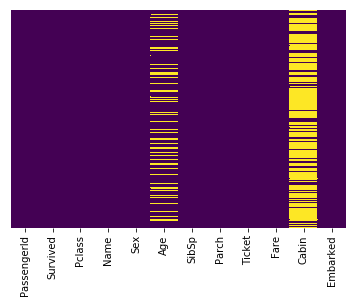

In [11]:
#checking for missing values

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

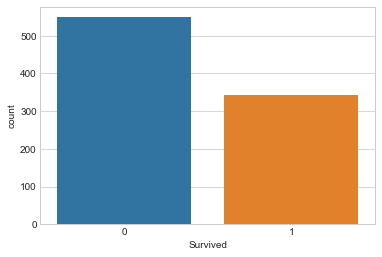

In [15]:
#exploratory Analysis
sns.set_style('whitegrid')

#survival data
sns.countplot(x='Survived',data=train)

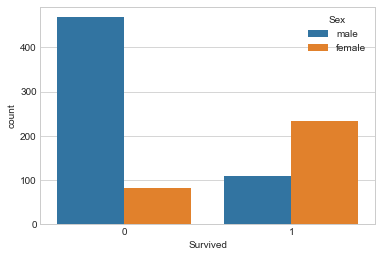

In [18]:
#Survival rate based on gender

sns.countplot(x='Survived',data=train, hue='Sex')

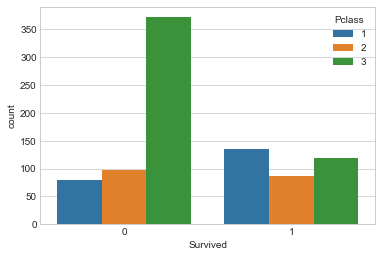

In [19]:
#Survival rate based on gender

sns.countplot(x='Survived',data=train, hue='Pclass')

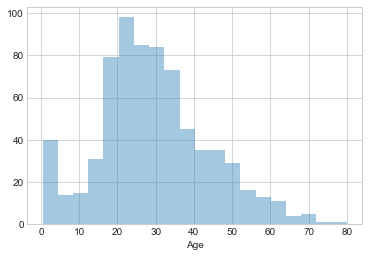

In [25]:
#Average age

sns.distplot(train['Age'].dropna(),kde=False)

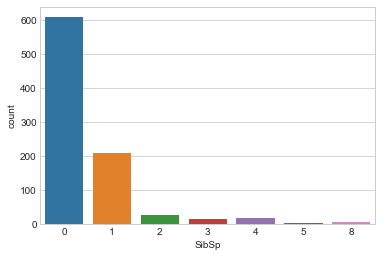

In [28]:
#sibling/Spouse/Children count

sns.countplot(x='SibSp',data=train)

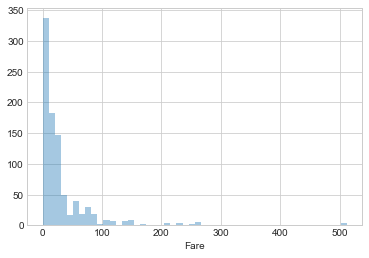

In [32]:
#train fare plot

sns.distplot(train['Fare'],kde=False)

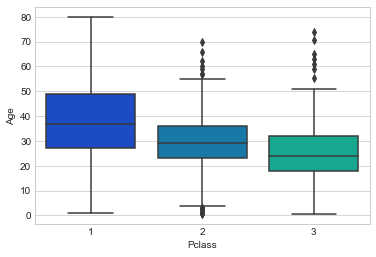

In [61]:
#box plot 

sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [116]:
# calculate avg age based on passenger class

pclass1_avgage=train[train['Pclass']==1]['Age'].mean()
pclass2_avgage=train[train['Pclass']==2]['Age'].mean()
pclass3_avgage=train[train['Pclass']==3]['Age'].mean()

In [126]:
# filling missing values

def fillvalues(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return pclass1_avgage 
        elif Pclass == 2:
            return pclass2_avgage
        else:
            return pclass3_avgage
    else:
        return Age

train['Age']=train[['Age','Pclass']].apply(fillvalues,axis=1)

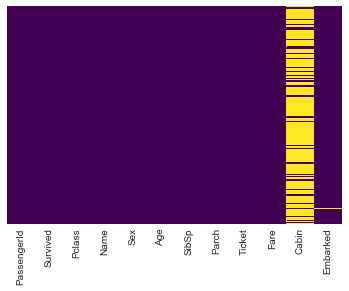

In [133]:
#heatmap to check missing values

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [139]:
# Remove cabin column and other NA values in embarked

train.drop('Cabin',axis=1,inplace=True)

In [141]:
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [150]:
#converting categorical variables

sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.drop(['PassengerId'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)

In [153]:
#Preparing the test data set

test=pd.read_csv('titanic_test.csv')

#calculating avg age for test

pclass1_avgage_test=test[test['Pclass']==1]['Age'].mean()
pclass2_avgage_test=test[test['Pclass']==2]['Age'].mean()
pclass3_avgage_test=test[test['Pclass']==3]['Age'].mean()

# filling missing values

def fillvalues(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return pclass1_avgage_test 
        elif Pclass == 2:
            return pclass2_avgage_test
        else:
            return pclass3_avgage_test
    else:
        return Age

test['Age']=test[['Age','Pclass']].apply(fillvalues,axis=1)

# Removing cabin

test.drop('Cabin',axis=1,inplace=True)
test.dropna(inplace=True)

#converting categorical variables

sex=pd.get_dummies(test['Sex'],drop_first=True)
embark=pd.get_dummies(test['Embarked'],drop_first=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test = pd.concat([test,sex,embark],axis=1)
test.drop(['PassengerId'],axis=1,inplace=True)

In [164]:
#Training Set
X_train=train.drop('Survived',axis=1)

In [167]:
y_train=train['Survived']

In [168]:
#Building Model

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [169]:
#predicting

predictions = logreg.predict(test)